### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import plotly.express as px 

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/Subroy1/MLAI_Berkeley_Assignment5.1_Customer_Coupon/refs/heads/main/coupons.csv')
#pd.read_csv('/kaggle/input/coupons/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Not all columns are visible , find the invisible columns in the result 


In [7]:
data.info()
# Following columns are not visible , hence take some sample to inspect them as well 
#  10  has_children          12684 non-null  int64 
#  11  education             12684 non-null  object
#  12  occupation            12684 non-null  object
#  13  income                12684 non-null  object
#  14  car                   108 non-null    object
#  15  Bar                   12577 non-null  object

data[['has_children','education', 'occupation','income','car','Bar']].head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,has_children,education,occupation,income,car,Bar
0,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
1,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never


2. Investigate the dataset for missing or problematic data.

In [8]:
# Make some initial observations on the data , for example , it does look like the car column has minimal non-null values. This is just one example. 
# For this purpose , I decided to take the df from info() and add a column called pctnull which would show how much of the data is missing . 
infodf= pd.DataFrame(data.isnull().sum())
infodf['pctnull'] = (infodf[0] /12684 )*100
infodf[infodf['pctnull']>0.0]  ##  Print out all of the columns with null values in them . 

,0,pctnull
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


3. Decide what to do about your missing data -- drop, replace, other...

Decision to handle missing data is to be taken with due care . There are different approaches depending upon how the EDA would get impacted and ultimnately impact the learning models . In my opinion, we should follow the following principles.
1. Drop columns - When there is more than 95% of data missing , for eg - cars
2. Drop rows - When this is a small number compared to the overall distribution (<5%) and conncerend attribute not so important . 
3. Fill in missing values depending upon analysis of measures of central tendency for the concerning variables. When we cannot afford to lose information on them.
   If data is skewed and there are outliers as determined by IQR (obersvations lying outside of Q1-1.5 times IQR  or Q3 + 1.5 times IQR) - fill with capped values.
   If data is normally distributed , determined by skewness , then fill with mean .
   If data is categorical , fill with mode. 


In [9]:
# Drop the car column 
data = data.drop(columns = ['car'])
data.shape # returns (12684, 25) columns reduced from 26 to 25 

#Decide column by column 
# Bar	107	0.843582
# CoffeeHouse	217	1.710817
# CarryAway	151	1.190476
# RestaurantLessThan20	130	1.024913
# Restaurant20To50	189	1.490066


(12684, 25)

In [10]:
data.sample(10)
#Bar'	CoffeeHouse	CarryAway	RestaurantLessThan20	Restaurant20To50
data.describe(include=['object'])

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,5197,3385,4672,5376,6077


**Check for duplicates **

In [11]:
# Continue Data cleaning
duplicate = data[data.duplicated()]
print("Number of duplicates  : ",len(duplicate))# returns 74 duplicates, these all can be cleaned up except keeping their first occurence 

print("Size of original df ",len(data))
# Number of duplicates  :  74
# Size of original df  12684
data = data.drop_duplicates()


print(len(data))  # 12610 // duplicates removed 

Number of duplicates  :  74
Size of original df  12684
12610


In [12]:
#Check how many rows could be deleted if any of the above columns are null or nan 

#data[['RestaurantLessThan20','Bar','CoffeeHouse','Restaurant20To50','CarryAway']].isna().any(axis=1).sum() # gives 605 which is 4.73 % of 12684 , 
#we decide to drop these 600 rows for ease but ideally can also convert the numerical ranged based categories to their medians and use it to back fill nan values for the columns respectively . 
# Lets proceed with data cleaning first and if time permits , will come back and do the median based approach. 
data=data.dropna(subset=['RestaurantLessThan20','Bar','CoffeeHouse','Restaurant20To50','CarryAway'])


4. What proportion of the total observations chose to accept the coupon?



In [13]:
# pctcouponaccept =100* data['Y'].value_counts()[1]/  (data['Y'].value_counts()[0]  +data['Y'].value_counts()[1])
# print(pctcouponaccept)

len(data[data['Y']==1])/ (len(data))



0.5684184225868244

5. Use a bar plot to visualize the `coupon` column.

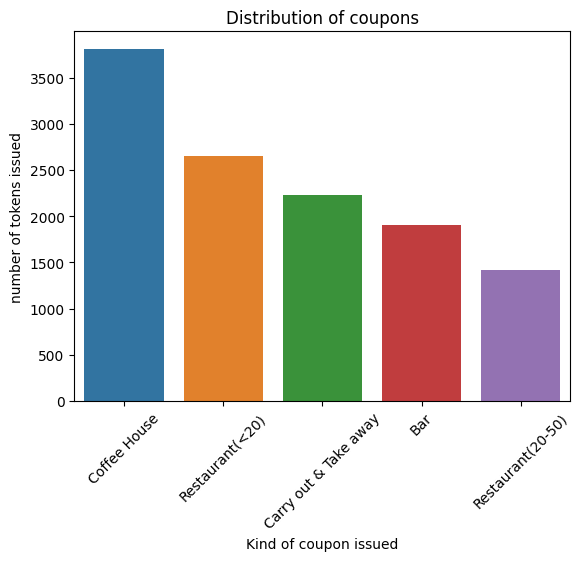

In [14]:
coupon_by_cat_df=pd.DataFrame(data['coupon'].value_counts())
coupon_by_cat_df=coupon_by_cat_df.rename(columns = {"count":"number of tokens issued", "coupon":"type of coupon"})
sns.barplot(data=coupon_by_cat_df, x='coupon', y = 'number of tokens issued', hue = 'coupon')
plt.title("Distribution of coupons")
plt.xticks(rotation=45)
plt.xlabel("Kind of coupon issued")
plt.show()

6. Use a histogram to visualize the temperature column.

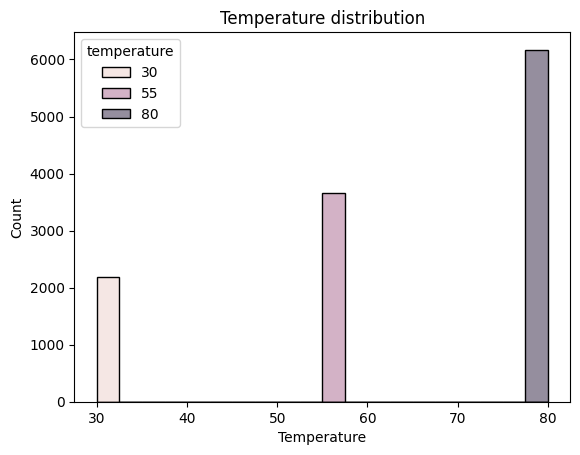

temperature
80    6171
55    3652
30    2184
Name: count, dtype: int64

In [15]:
sns.histplot(data=data, x='temperature' , bins =20, hue='temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title("Temperature distribution")
plt.show()

# Majority of the recorded observations have higher temperature around 50% of the entire dataset . 
data['temperature'].value_counts()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null  ob

In [17]:
data.query('coupon == "Bar"')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
bar_coupon_df=data.query('coupon == "Bar"')
bar_coupon_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [19]:
bar_coupon_df[bar_coupon_df['Y']==1]['Bar'].value_counts()

Bar
1~3      245
less1    244
never    149
4~8      114
gt8       33
Name: count, dtype: int64

2. What proportion of bar coupons were accepted?


In [20]:
# num_accepted = data[(data['coupon'] == 'Bar') & (data['Y'] == 1)].shape[0]
# num_bar = data[data['coupon'] == 'Bar'].shape[0]
# proportion = num_accepted / num_bar
# proportion
bar_coupon_accepted = len(bar_coupon_df[bar_coupon_df['Y']==1])
bar_coupon_not_accepted = len(bar_coupon_df[bar_coupon_df['Y']==0])
print(bar_coupon_accepted / len(bar_coupon_df)) #0.4118572927597062



0.4118572927597062


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.



In [21]:
# For this problem , create 2 categories of groups 
# Group1 - 'never','less1','1~3'
# Group2 - 'gt8','4~8'
# and count the acceptances for each group lets say A1 and A2. 
# Then the comparison would be A1 / A2
bc_lessthaneq3_df=bar_coupon_df[bar_coupon_df['Bar'].isin({'never','less1','1~3'})]
bc_morethan3_df=bar_coupon_df[bar_coupon_df['Bar'].isin({'gt8','4~8'})]

# taking mean because Y is a binary number hence number of 1s divided by total count would be the acceptance ratio . 
print("acceptance ratio of <=3 times a month  ",bc_lessthaneq3_df["Y"].mean())
print("acceptance ratio of >3 times a month",bc_morethan3_df["Y"].mean())

# acceptance of <=3  0.37244600116754234
# acceptance of >3 0.7616580310880829
# It is apparent that drivers opting to accept bar coupons more likely are the ones who frequently visit bars as well , 
#compared to those who attend infrequently and hence not inclined to accept coupon either. 

acceptance ratio of <=3 times a month   0.37244600116754234
acceptance ratio of >3 times a month 0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [22]:
# This is a conditional probability problem  𝑃(accept∣Group 1) vs. 𝑃(accept∣Group 2)
# Following is the age distribution category , need to categorize it into its own sets -below < 25 and above>=25
# age
# below21     81
# 21         397
#---------------
# 26         368
# 31         321
# 36         196
# 41         171
# 46          99
# 50plus     273

# For this problem , create 2 groups of drivers 
# Group1 - drivers who go to a bar more than once a month and are over the age of 25 
group1=bar_coupon_df[bar_coupon_df['Bar'].isin({'1~3','4~8','gt8'})  & (~bar_coupon_df['age'].isin({'below21','21'}))]
group1accept=group1["Y"].mean() # 278/403 

acceptedNumgroup1=group1["Y"].value_counts()[1] # 278

# Group2 - All other drivers 
group2len= len(bar_coupon_df) - len(group1)  # number  of rows in group 2  1503 

# number of accepted coupon rows in group2 = (# number of Y in bar_coupon_df- # number of Y in group1 )
group2acceptNum = len(bar_coupon_df[bar_coupon_df['Y']==1]) - len(group1[group1['Y']==1]) # 507 
group2accept = group2acceptNum/group2len  # acceptance rate for group2

# Print results
print("Acceptance rate for Group 1 (bar > 1 & age > 25):", group1accept)
print("Acceptance rate for Group 2 (all others):", group2accept)

# Yes, there is a difference
# It is quite clear that drivvers who are above the age of 25 and visit bars are more than twice as likely to acccept bar coupons 
# than those who do not fall under this category . 

Acceptance rate for Group 1 (bar > 1 & age > 25): 0.6898263027295285
Acceptance rate for Group 2 (all others): 0.3373253493013972


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [23]:
#We again split the bar_coupon_df into 2 groups - Group1 with the below 3 conditions and Group2 which is the complement of Group1 ie bar_coupon_df-group1 extracted by 
# group2 = bar_coupon_df[~bar_coupon_df.index.isin(group1.index)]
#group1 conditions   bar_coupon_df [cond1 & cond2 & cond3 ]
# Cond1 -drivers who go to bars more than once a month  
list_more_once_mnth= ['1~3','4~8','gt8']
cond_bar_gt_month = bar_coupon_df['Bar'].isin(list_more_once_mnth)
# Cond2 - had passengers that were not a kid # Alone 1139# Friend(s) 316# Partner 259 # Kid(s) 192
cond_pass_not_kid = ~bar_coupon_df['passanger'].isin({"Kid(s)"})
# Cond3- had occupations other than farming, fishing, or forestry. 
cond_not_3f = ~bar_coupon_df['occupation'].isin({"Farming Fishing & Forestry"})

# combine all of the 3 conditions above to get the resulting dataFrame
group1 = bar_coupon_df[cond_bar_gt_month & cond_pass_not_kid & cond_not_3f]
group1_accept_rate=group1['Y'].mean()


# Create group2 as negation of group1 rather , (bar_coupon_df-group1)
group2= bar_coupon_df[~bar_coupon_df.index.isin(group1.index)]
group2_accept_rate=group2['Y'].mean()

#Print out the acceptance ratios within each group. 
print("Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. ","\n", group1_accept_rate)
print("Acceptance rate for others", group2_accept_rate)



Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.  
 0.7094339622641509
Acceptance rate for others 0.29723837209302323


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [24]:
list_more_once_mnth= ['1~3','4~8','gt8']
cond_bar_gt_month = bar_coupon_df['Bar'].isin(list_more_once_mnth)
cond_pass_not_kid = ~bar_coupon_df['passanger'].isin({"Kid(s)"})
cond_not_widowed =  ~bar_coupon_df['maritalStatus'].isin(['Widowed'])
cond_cheap_rest_gt_4pm = bar_coupon_df['RestaurantLessThan20'].isin(['gt8','4~8'])
cond_age_under_30= bar_coupon_df['age'].isin(['below21','21','26'])

list_income_lt_50k= ['Less than $12500', '$12500 - $24999','$25000 - $37499','$37500 - $49999']
cond_income_lt_50k= bar_coupon_df['income'].isin(list_income_lt_50k)

#1.go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
cond_case1=cond_bar_gt_month & cond_pass_not_kid & cond_not_widowed

#2.go to bars more than once a month and are under the age of 30 OR
cond_case2 = cond_bar_gt_month & cond_age_under_30

#3.go to cheap restaurants more than 4 times a month and income is less than 50K.
cond_case3 =cond_cheap_rest_gt_4pm  & cond_income_lt_50k
or_group_mask = (cond_case1|cond_case2| cond_case3)
accept_rate_all_or_conditions= bar_coupon_df[or_group_mask]['Y'].mean()

accept_rate_all_other_drivers= bar_coupon_df[~(or_group_mask)]['Y'].mean()

#Print results 
print("Combined OR results for all the steps:",accept_rate_all_or_conditions)
print("All other drivers:",accept_rate_all_other_drivers)

Combined OR results for all the steps: 0.5871313672922251
All other drivers: 0.2991379310344828


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [25]:
#From the results and observtions above , it is apparent that age , demographics , occupation , marital status ,
#driver's current eat out behavior and the passengers whom they carry play a significant role in the driver's accepting the bar coupons. 

# Drivers who go to bars more than once a month, had passengers who were not kids, and had occupations other 
# than agricultutal professions (Farming Fishing & Forestry) show a higher acceptance rate compared to all other drivers. 
# This suggests that frequent bar-goers under these conditions are more likely to accept the bar coupon than the rest of the population.

# Drivers who go to bars at least once a month and driving alone or with adults are more twice as likely to accept bar coupon. 

# It is also quite clear that drivers > 25 and already visit bars are more than twice as likely to acccept bar coupons than those who do not.

#Income also shapes the drivers' behavior because those who visit cheap resstaurants , earn <50K are also accepting coupons more readily.

#Conclusion
#The above hypotheses provides multiple criteria for the coupon issuing company to prepare customer segmentations and hence target that customer base in 
# order to benefit more from the operational and support costs related to coupons . 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [26]:
# Decided to analyze the patterns of driver behavior opting to take coupons for carry out and takeaways .
togo_coupon_df = data[data['coupon']=='Carry out & Take away']
togo_coupon_df.head(2)

# columns of interest 'destination','direction_same','direction_opp','Bar', 'RestaurantLessThan20', 'Restaurant20To50','CoffeeHouse', 'CarryAway', 'gender', 'age', 'maritalStatus', 'has_children','toCoupon_GEQ5min','toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'Y'
# we will try to analyze the data on the above features with respect to coupon acceptance .

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1



1. Compare accceptance rate of takeaway coupons by drivers driving in same direction, having children , and time to avail coupon more than 5 mins. 


In [27]:
togo_coupon_df.head(2) # toCoupon_GEQ5min, direction_same, has_children
cond_mask = (togo_coupon_df['direction_same']) & (togo_coupon_df['toCoupon_GEQ5min']==1)  & (togo_coupon_df['has_children'])
group1_df= togo_coupon_df[cond_mask]
group2_df= togo_coupon_df[~cond_mask]

# Print out the results and compare the groups' accpetance rates 
print("Accceptance rate for takeaway coupons :", group1_df["Y"].sum()/ len(group1_df))
print("Accpetance rate otherwise:", group2_df["Y"].mean())

# Accceptance rate for takeaway coupons : 0.717687074829932
# Accpetance rate otherwise: 0.7385250128932439

Accceptance rate for takeaway coupons : 0.717687074829932
Accpetance rate otherwise: 0.7385250128932439


2.Compare the acceptance rate of Carry out & Take away coupons between drivers who received the coupon when it was not raining, had temperatures above 55°F, were Male, and had coupons expiring in 1 day, versus all other drivers. Is there a difference?


In [28]:
clear_weather_list= ['Sunny','Snowy']
temperature_above_55= [80]
cond_mask=togo_coupon_df['weather'].isin(clear_weather_list)  & togo_coupon_df['temperature'].isin(temperature_above_55)   & (togo_coupon_df['gender']=='Male') & (togo_coupon_df['expiration']=='1d')

print(togo_coupon_df[cond_mask]["Y"].mean()) # 0.8130841121495327
print(togo_coupon_df[~cond_mask]["Y"].mean()) #0.7275879148093115


0.8130841121495327
0.7275879148093115


3. Compare acceptance rate of coupons by drivers where whether is Sunny vs Raining 

In [29]:
#Pleasant weather and conditions 
print (togo_coupon_df[ (togo_coupon_df['weather']=="Rainy")]['Y'].mean())
print (togo_coupon_df[ (togo_coupon_df['weather']=="Sunny")]['Y'].mean())

# print("acceptance by drivers where coupon expires in 2 hours in sunny weather and temperature is 80F", pleasant_weather['Y'].mean())
# print("acceptance by drivers  Rainy weather, coupon expires in a day and temp is 30F", inclement_weather['Y'].mean())

0.6086956521739131
0.7627737226277372


4. Compare acceptance rate based on gender as a whole . 

In [30]:
male_df=togo_coupon_df[togo_coupon_df['gender']=="Male"]
female_df= togo_coupon_df[togo_coupon_df['gender']=="Female"]

# coffe_df =  data.query("coupon == 'Coffee House'")
# male_df=coffe_df[coffe_df['gender']=="Male"]
# female_df= coffe_df[coffe_df['gender']=="Female"]

male_accept_rate = male_df["Y"].mean()
female_accept_rate = female_df["Y"].mean()
print (female_accept_rate)
print (male_accept_rate)

# 0.7134146341463414
# 0.759447004608295

0.7134146341463414
0.759447004608295


##### Do some visualization plots for representing some meaningful insights on the data .

In [31]:
# Do a violin plot to show the distribution per passanger category. 
fig = px.violin(data[data['weather']=='Sunny'], x ='passanger' , y = 'Y', title = 'Distribution by passanger',points = 'all', color = 'passanger')
fig.show()

<Axes: xlabel='age', ylabel='count'>

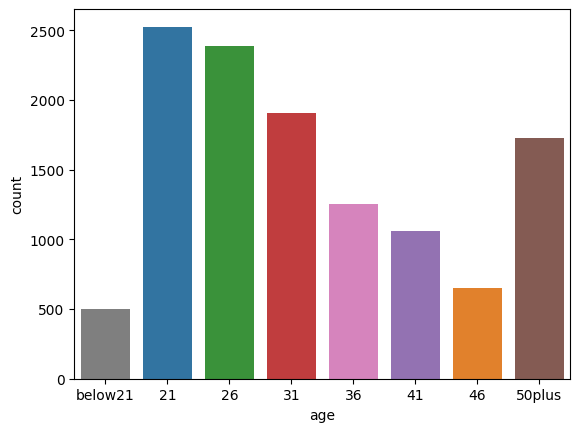

In [32]:
# Using histogram , visualize the age of drivers in the dataset 

age_order = ['below21','21','26','31','36','41','46','50plus']
sns.countplot(data=data , x ='age', hue='age',order=age_order)

 Plot a pie chart of the coupon types as well and include pct per sector 

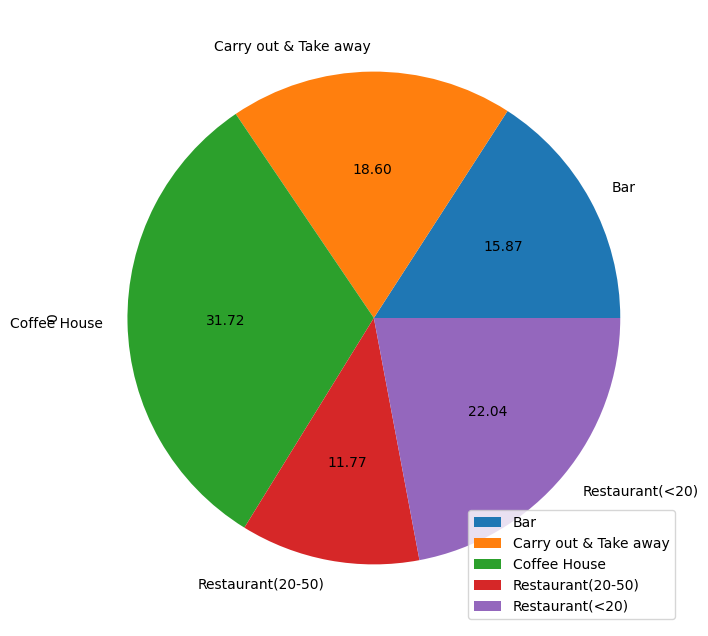

In [36]:
# distribution of total coupons by coupon type 
coupontypedf=pd.DataFrame(data.groupby('coupon').size())

# plot a pie chart of the coupon types as well and include pct per sector 
coupontypedf.plot(kind='pie', subplots=True, autopct='%.2f', figsize=(8,8)) 
plt.show()

Plot a pie chart of the coupons accepted in percentages by copupon type 

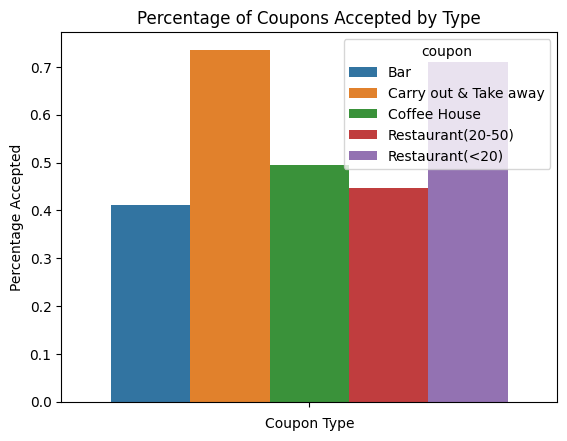

In [37]:
# distribution of total coupons by coupon type 
coupontypedf=pd.DataFrame(data.groupby('coupon').size())

acceptbycopupondf= pd.DataFrame(data[data["Y"]==1].groupby('coupon').size())
merged_accept_coupon_df= pd.merge(left=acceptbycopupondf, right=coupontypedf, left_on='coupon', right_on='coupon', how='inner').head()
merged_accept_coupon_df['pctaccepted'] = merged_accept_coupon_df['0_x']/merged_accept_coupon_df['0_y']

# plot a pie chart of the coupons accepted in percentages by copupon type 
sns.barplot(data=merged_accept_coupon_df, y='pctaccepted', hue='coupon')
plt.xlabel('Coupon Type')
plt.ylabel('Percentage Accepted')
plt.title('Percentage of Coupons Accepted by Type')
plt.show()

In [35]:
## Interpretations from the above data analysis (Driver persona hypothesis)
# From Q1 above , even with restrictive condition such as driving with children, we observe that there is hardly any difference between the 2 groups. This is a contrasting behaviour 
# to otherwise perceived notion of coupon acceptance behavior. This implies that the ease of accesing in 5 mins and driving in same direction favors acceptance of coupon. 

# Gender does not play a major role except that across coupon categories (Rest, bar , coffe, takeaways) ,Male edges slightly higher than Females in terms of acceptance . 
# though for expensive restaurants (20-50), the acceptance rate is typically below 50 pct. 

# People wont want to get out of their cars during rain to avail the coupons. Under favourable weather conditions , 
#Male drivers have an 80% probability of accepting coupons with validity of one day, this indicates that many would possibly consider coming back the next day for take away as well. 

# From the pie chart and bar graphs about different coupon categories, it is apparent that in spite of maximum number of coupons being issued for coffee
# houses(31%) vs takeaways (18%) , the acceptance rate is a lot higher for the latter (70% acceptance) , on the entire dataset of 2k+ observations . 

#Limitations and Improvements:
#I had removed about 1%  of rows as an easier way to standardize the data by using dropna , it might make more sense that for some of the columns 
# which are ordinally represented such as gt8 , age group etc , correct measures of central tendency are used to fillna() instead of dropna() for deeper and more accurate inights. 